# District-wise Data Analysis

### The jupyter notebook is intended to analyze the trends in a particular user selected district over the tenure of 269 days. It fits a polynomial regression model and calculates the R-Square values for different degrees, finally obtaining the optimal model. It also builds correlation among the parameters, thus analyzing the trends.


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis. To import the data into a pandas dataframe (df) and display the first five rows using head()

import os, types
import pandas as pd

In [2]:
# To import the .csv data into a pandas dataframe and display the first five rows
    
df2 = pd.read_csv(body)
df2.head()

,States,Districts,Day,Retail,Grocery/ Pharma,Parks,Transit Spots,Workplaces,Residential,Lockdown,Active
0,1,1,1,-83,-48,-57,-68,-33,23,-100,60
1,1,2,1,-87,-43,-74,-57,-27,22,-100,27
2,1,3,1,-86,-54,-70,-61,-35,25,-100,177
3,1,4,1,-88,-58,-68,-73,-40,24,-100,140
4,1,5,1,-85,-47,-72,-62,-34,27,-100,239


In [3]:
# describe() gives a outline of the dataset by providing the primary analysis 

df2.describe()

,States,Districts,Day,Retail,Grocery/ Pharma,Parks,Transit Spots,Workplaces,Residential,Lockdown,Active
count,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000,111162.000000
mean,13.367122,16.652750,137.485544,-35.477087,16.138114,-26.685252,-24.430291,-14.522886,12.518487,32.410356,777.369551
std,6.987798,13.920379,78.678953,23.510149,31.676661,39.746987,22.890399,14.700432,6.087682,94.602586,2597.944066
min,1.000000,1.000000,1.000000,-97.000000,-92.000000,-100.000000,-93.000000,-87.000000,-23.000000,-100.000000,-73.000000
25%,7.000000,6.000000,67.000000,-53.000000,-4.000000,-57.000000,-40.000000,-22.000000,8.000000,-100.000000,45.000000
50%,12.000000,13.000000,144.000000,-34.000000,15.000000,-31.000000,-25.000000,-13.000000,12.000000,100.000000,159.000000
75%,20.000000,23.000000,207.000000,-18.000000,35.000000,-2.000000,-10.000000,-5.000000,16.000000,100.000000,497.000000
max,24.000000,68.000000,269.000000,109.000000,216.000000,261.000000,141.000000,61.000000,48.000000,100.000000,82172.000000


In [4]:
# To input the user district and state for analysis

s = int(input("Enter the State Code: "))
d = int(input("Enter the District Code: "))

Enter the State Code: 12
Enter the District Code: 18


In [5]:
# To segregate the district specific data 

df3 = df2.loc[(df2.States == s) & (df2.Districts == d)]
df3.head()

,States,Districts,Day,Retail,Grocery/ Pharma,Parks,Transit Spots,Workplaces,Residential,Lockdown,Active
148,12,18,1,-89,-47,-89,-77,-47,29,-100,86
472,12,18,2,-87,-45,-88,-75,-64,36,-100,106
805,12,18,3,-88,-44,-88,-74,-65,35,-100,114
1138,12,18,4,-87,-41,-87,-72,-63,34,-100,102
1475,12,18,5,-87,-40,-87,-73,-63,34,-100,100


In [6]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# To divide the dataframe into X (independent parameters) and Y (dependent variable)

X1 = df3[['Day','Retail','Grocery/ Pharma','Parks','Transit Spots','Workplaces','Residential','Lockdown']]
Y1 = df3[['Active']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# To divide the dataset into training and testing dataset for enhanced performance on unknown data

x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 0)

In [10]:
# To perform polynomial regression model on th training dataset and test the model on testing dataset to acquire the R-Square values (for degress 1-10

Rsqu_test = []
order = [1,2,3,4,5,6]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x1_train_pr = pr.fit_transform(x1_train)
    x1_test_pr = pr.fit_transform(x1_test)
    lm.fit(x1_train_pr,y1_train)
    Rsqu_test.append(lm.score(x1_test_pr,y1_test))

In [11]:
Rsqu_test

[0.49696914445925977,
 0.7062436800606247,
 -6.7383547759250115,
 -90.22388980695511,
 -73.85085342844842,
 -102.08701361530281]

In [12]:
# Maximum Value of R-Square value to select the optimum model

i = Rsqu_test.index(max(Rsqu_test))
Rsqu_test[i]

0.7062436800606247

In [13]:
# To get the model with highest R-Square Value

pr = PolynomialFeatures(degree = i+1)
x_train_pr = pr.fit_transform(x1_train)
x_test_pr = pr.fit_transform(x1_test)
lm.fit(x_train_pr,y1_train)

LinearRegression()

In [14]:
# To get the coefficients and intercept value of the model

print("Coefficients: \n", lm.coef_, "\n\n","Intercept:", lm.intercept_)

Coefficients: 
 [[ 1.94558242e+12  3.01360418e+03 -1.35344423e+03  2.12195272e+03
  -5.87595856e+03 -4.43815217e+02 -1.21405673e+03  3.20873305e+03
  -1.27995789e+03 -4.60378416e+00  2.76322123e+00 -4.76483522e+00
   2.65538020e+01 -6.80750594e+00  2.35782487e+00 -8.51807802e+00
   3.58980167e+00 -1.19272595e+01  1.36862341e+01  6.37641864e+01
  -6.46028716e+01 -2.26723272e+01  2.95994251e+01  3.08887855e+00
  -6.99060068e+00 -3.73947622e+00  1.87313956e+01  7.32008694e+00
  -9.97067601e-01  3.90219954e-01 -4.78886337e+01  2.98364777e+00
   8.61262278e+00  2.35303926e+01 -1.93153983e+01  1.80742698e+01
  -7.11251858e+00 -6.02016883e+01  7.13250338e+00 -5.54911608e+00
  -2.08909036e+01  1.26044882e+00 -5.04989432e+01  5.29117582e+00
   0.00000000e+00]] 

 Intercept: [-1.94558289e+12]


In [15]:
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

import seaborn as sns

In [16]:
# Select a dataframe of all parameters (dependent and independent)

D = df3[['Retail','Grocery/ Pharma','Parks','Transit Spots','Workplaces','Residential','Active']]

In [17]:
# To find pearson correlation among the parameters

corr = D.corr()

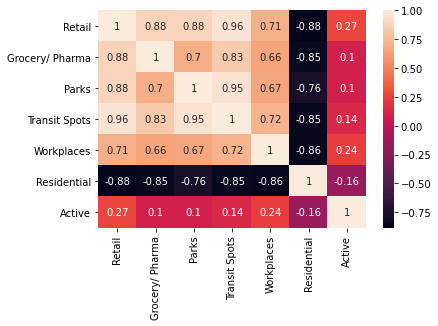

In [18]:
# To visualize the correlation in form of a heatmap

sns.heatmap(corr,annot = True)